# Processing Speech Audio Files 

In [3]:
#important python modules
from scipy.io import wavfile
#from pydub import AudioSegment
from numpy import linspace
import matplotlib.pyplot as plt
#ensure that python plot is shown inline
%matplotlib inline 
import librosa
import numpy as np
import sklearn

In [4]:
#file location of .flac
file_loc='/media/ai2-deeplearning/data_disk/data_sets/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac'

#read file flac and convert it to wav format
song = AudioSegment.from_file(file_loc)
song.export("test.wav",format = "wav")

NameError: name 'AudioSegment' is not defined

In [5]:
fName = 'test.wav'
fs, signal = wavfile.read(fName)
signal = signal / max(abs(signal))                        # scale signal
assert min(signal) >= -1 and max(signal) <= 1
print 'fs           ==> ', fs, 'Hz'                       # sampling rate
print 'len(signal)  ==> ', len(signal), 'samples'


_, (sp1, sp2) = plt.subplots(1, 2, figsize=(16, 4))

# plot raw signal
sp1.plot(signal)
sp1.set_title('Raw Signal')
sp1.set_xlabel('SAMPLE\n(a)')
sp1.autoscale(tight='both')

# plot spectrogram
sp2.specgram(signal)
sp2.set_title('Spectogram')
sp2.set_xlabel('TIME\n(b)')
nSecs = len(signal) / fs
ticksPerSec = 3
nTicks = nSecs * ticksPerSec + 1                # add 1 to include time=0
xTickMax = sp2.get_xticks()[-1]
sp2.set_xticks(linspace(0, xTickMax, nTicks))
sp2.set_xticklabels([round(x, 2) for x in linspace(0, nSecs, nTicks)])
sp2.set_ylabel('FREQ')
maxFreq = fs / 2
nTicks = maxFreq / 1000 + 1                     # add 1 to include freq=0
sp2.set_yticks(linspace(0, 1, nTicks))
sp2.set_yticklabels(linspace(0, maxFreq, nTicks));
sp2.autoscale(tight='both')

IOError: [Errno 2] No such file or directory: 'test.wav'

## Librosa Library

[-0.00650024 -0.00510397 -0.00623452 ...,  0.00223894 -0.00611179
 -0.00972519]


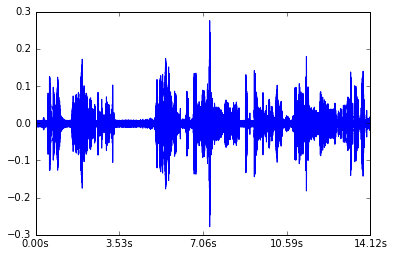

In [36]:
#Loading Audio File
x, fs = librosa.load('test.wav')
librosa.display.waveplot(x, sr=fs)
print x

Test_MFCCs computed 80 MFCCs over 607 frames.

In [14]:
test_mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=80)
print test_mfccs.shape

(80, 607)


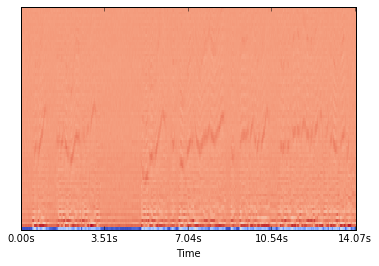

In [19]:
#Plotting MFCCs with respect to timeframe
librosa.display.specshow(test_mfccs, sr=fs, x_axis='time')

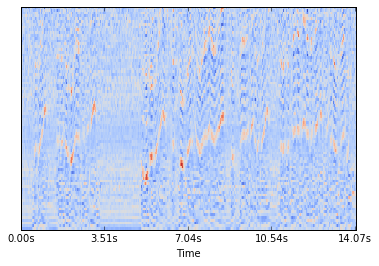

In [25]:
#scale the mfcc features
scaled_test_mfccs=sklearn.preprocessing.scale(test_mfccs, axis=1)
#Plotting scaled_MFCCs with respect to timeframe
librosa.display.specshow(scaled_test_mfccs, sr=fs, x_axis='time')

In [34]:
print 'Scaled MFCCS'
print scaled_test_mfccs.shape
print 'Scaled Mean and Variance'
print scaled_test_mfccs.mean(axis=1)
print scaled_test_mfccs.var(axis=1)

with

Scaled MFCCS
(80, 607)
Scaled Mean and Variance
[ -4.44820823e-16   1.40469734e-16   1.40469734e-16   8.77935835e-17
   1.17058111e-17  -5.85290557e-18   9.36464891e-17  -4.68232445e-17
   2.34116223e-17   9.36464891e-17   2.34116223e-17  -2.34116223e-17
  -5.85290557e-18  -8.77935835e-18  -5.85290557e-17  -5.85290557e-18
   2.34116223e-17   2.92645278e-17   1.75587167e-17   4.68232445e-17
  -5.85290557e-17  -4.68232445e-17  -5.85290557e-17   2.34116223e-17
   0.00000000e+00   3.51174334e-17   0.00000000e+00   4.68232445e-17
  -1.17058111e-17   1.46322639e-17  -6.73084140e-17   1.17058111e-16
   4.68232445e-17   2.34116223e-17   0.00000000e+00   0.00000000e+00
  -4.68232445e-17  -4.68232445e-17   5.85290557e-18   3.51174334e-17
   3.51174334e-17  -4.38967917e-17  -1.17058111e-17  -4.68232445e-17
  -1.17058111e-17   1.17058111e-17  -9.36464891e-17  -1.75587167e-16
   1.98998789e-16  -1.17058111e-17   0.00000000e+00   5.85290557e-18
   1.46322639e-16  -3.51174334e-17  -9.36464891e-17  -8